<a href="https://colab.research.google.com/github/metsumesquita/kaggle-colab-jupyter/blob/main/neighbourhoodNYC_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##importaçoes

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

##leitura

In [ ]:
dados = pd.read_csv("AB_NYC_2019.csv", error_bad_lines=False)

In [ ]:
display(dados)

In [ ]:
dados.head()

NameError: ignored

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

In [ ]:

print("Colunas: ", list(dados.columns))

Colunas:  ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']


##2-REMOVENDO COLUNAS E LINHAS

In [ ]:
dados=dados.drop(["host_name"], axis=1)


In [ ]:
dados= dados[dados['neighbourhood_group'].notna()]
dados= dados[dados['host_id'].notna()]
dados= dados[dados['price'].notna()]
dados= dados[dados['room_type'].notna()]

In [ ]:
# retirada do custo zero
custo_zero = dados[ dados['price'] == 0 ].index
# Delete these row indexes from dataFrame
dados.drop(custo_zero , inplace=True)

In [ ]:
dados.dropna()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
10,5295,Beautiful 1br on Upper West Side,7702,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [ ]:
dados.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.888400e+04,4.888400e+04,48884.000000,48884.000000,48884.000000,48884.000000,48884.000000,38833.000000,48884.000000,48884.000000
mean,1.901679e+07,6.762203e+07,40.728953,-73.952176,152.755053,7.029887,23.271991,1.373128,7.144628,112.779498
std,1.098432e+07,7.861666e+07,0.054532,0.046159,240.170260,20.512224,44.551331,1.680391,32.956185,131.627271
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.470548e+06,7.817310e+06,40.690100,-73.983080,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967574e+07,3.079257e+07,40.723080,-73.955685,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915297e+07,1.074344e+08,40.763120,-73.936290,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


###descriçoes

In [ ]:
valores=dados['price'].value_counts()
print(valores)
###entao 2051 pagam o valor de 100 para alugar um lugar

100     2051
150     2047
50      1534
60      1458
200     1401
        ... 
2010       1
1485       1
822        1
539        1
1880       1
Name: price, Length: 673, dtype: int64


In [ ]:
###entao tem 12717 lugares nos mais o minimo de noite é 1 dia
###3758 lugares nos mais pode se passar um mes
print(dados['minimum_nights'].value_counts())

1       12717
2       11693
3        7998
30       3758
4        3302
        ...  
42          1
186         1
265         1
1000        1
364         1
Name: minimum_nights, Length: 109, dtype: int64


In [ ]:
print(dados['number_of_reviews'].head())

0      9
1     45
2      0
3    270
4      9
Name: number_of_reviews, dtype: int64


In [ ]:
contagem_freq=dados['number_of_reviews'].value_counts()
print(contagem_freq)

0      10051
1       5243
2       3464
3       2519
4       1994
       ...  
404        1
436        1
388        1
341        1
607        1
Name: number_of_reviews, Length: 394, dtype: int64


In [ ]:

print(dados['last_review'].head())
###pode ter NAN

0    2018-10-19
1    2019-05-21
2           NaN
3    2019-07-05
4    2018-11-19
Name: last_review, dtype: object


In [ ]:

print(dados['neighbourhood_group'].head())

0     Brooklyn
1    Manhattan
2    Manhattan
3     Brooklyn
4    Manhattan
Name: neighbourhood_group, dtype: object


In [ ]:
burgo_freq=dados['neighbourhood_group'].value_counts()
print(burgo_freq)

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64


In [ ]:
## Uso de funções de agregação

## Média e desvio padrão do custo
print("Média: ", dados['price'].mean())

print("Desvio padrão: ", dados['price'].std())

## Máximo e Mínimo de custo
print("\nMínimo: ", dados['price'].min())

print("Máximo: ", dados['price'].max())

## Soma total de custos
print("\nSoma: ", dados['price'].sum())

Média:  152.75505277800508
Desvio padrão:  240.1702601090409

Mínimo:  10
Máximo:  10000

Soma:  7467278


##3-Agrupando dados:

In [ ]:
## a soma dos lucros de cada bairro

sum_hood =dados[['price','neighbourhood_group']].groupby("neighbourhood_group").sum()

sum_hood.sort_values(by = 'price', ascending = False)
###manhattan possui o maior lucro

,price
neighbourhood_group,
Manhattan,4264527
Brooklyn,2500600
Queens,563867
Bronx,95459
Staten Island,42825


In [ ]:
#numero de lugares pra alugar por bairro
number_of_airb_hood=dados["neighbourhood_group"].value_counts()
display(number_of_airb_hood)

Manhattan        21660
Brooklyn         20095
Queens            5666
Bronx             1090
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [ ]:
#valor medio das reviews por bairro

reviws_group =dados[["number_of_reviews","neighbourhood_group"]].groupby("neighbourhood_group").mean()

reviws_group.sort_values(by = 'number_of_reviews', ascending = False)

,number_of_reviews
neighbourhood_group,
Staten Island,30.941019
Queens,27.700318
Bronx,25.977982
Brooklyn,24.197661
Manhattan,20.986565


In [ ]:

prince_host =dados[['price',"host_id"]].groupby("host_id").sum()

prince_host .sort_values(by = 'price', ascending = False)

,price
host_id,
219517861,82795
107434423,70331
156158778,37097
205031545,35294
30283594,33581
12243051,20451
16098958,20060
836168,19500
200380610,18865


##Gráfico de barras

```
# Isto está formatado como código
```



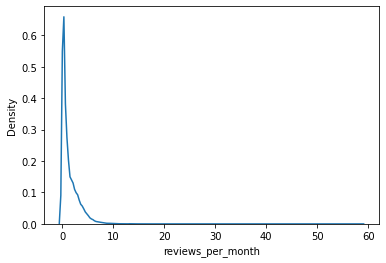

In [ ]:

sns.kdeplot(dados['reviews_per_month'].dropna())

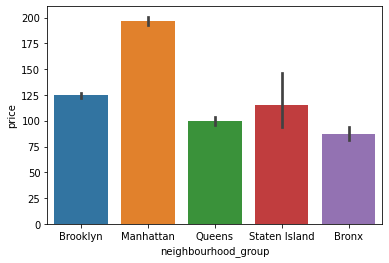

In [ ]:
sns.barplot(x=dados['neighbourhood_group'],y=dados['price'])
##procurar saber dessas linhas cinzas

###kde plot — kernel density estimation plot

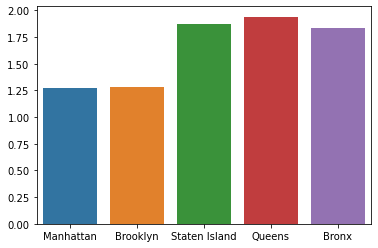

In [ ]:
lista_burgos=['Manhattan','Brooklyn','Staten Island','Queens','Bronx']
##colocado nessa ordem de forma proposital
lista_media=[]

for bairro  in lista_burgos:

   lista_media.append(  dados['reviews_per_month'][dados['neighbourhood_group']==bairro].mean())

sns.barplot(x=lista_burgos,y=lista_media)
###a media de reviews por mes de cada bairro

(array([258., 145.,  93.,  73.,  66.,  25.,   9.,   3.,   0.,   1.]),
 array([ 1.,  3.,  5.,  7.,  9., 11., 13., 15., 17., 19., 21.]),
 <a list of 10 Patch objects>)

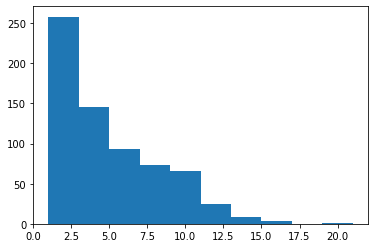

In [ ]:
num=dados['reviews_per_month'][dados['number_of_reviews']>100].value_counts()
plt.hist(num)


## Gráfico de linhas

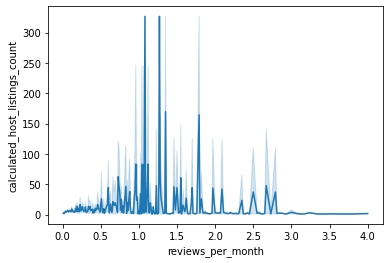

In [ ]:

subConjuntoDeDados = dados[dados['number_of_reviews'].between(1,4)]
sns.lineplot(data=subConjuntoDeDados, x="reviews_per_month", y="calculated_host_listings_count")
plt.show()

# Gráfico de regressão linear

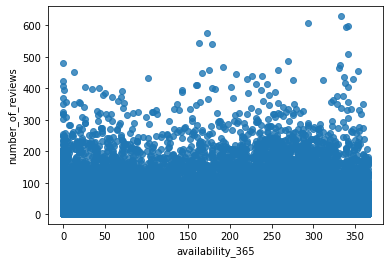

In [ ]:
# Gráfico de regressão linear
sns.regplot(x=c, y='number_of_reviews', data=dados[dados['last_review'] >' 2015-05-15']);
##nao ajudou em nada

###usando sns.scatterplot():

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


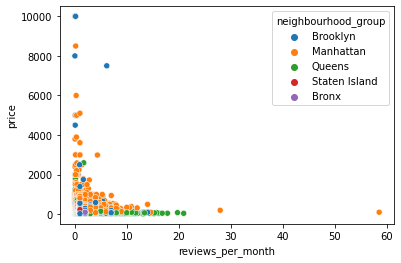

In [ ]:
sns.scatterplot("reviews_per_month",'price',
                hue='neighbourhood_group',  data=dados)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


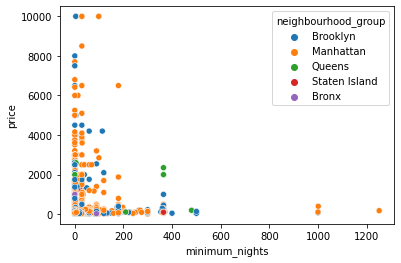

In [ ]:
sns.scatterplot("minimum_nights",'price',
                hue='neighbourhood_group',  data=dados)

###A função sns.lmplot()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


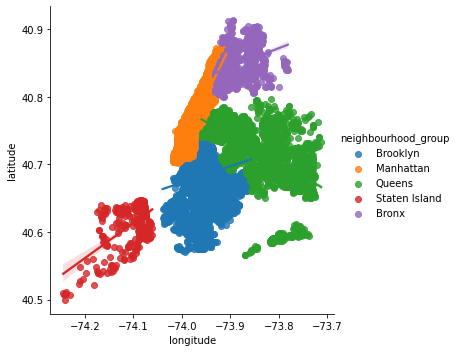

In [ ]:
sns.lmplot('longitude','latitude',hue='neighbourhood_group', data=dados)

## Scatterplot (gráfico de dispersão) - Relação entre 2 variáveis

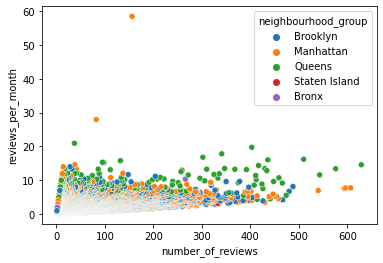

In [ ]:


sns.scatterplot( data=dados[dados['last_review'] >' 2015-05-15'], x='number_of_reviews', y="reviews_per_month", hue='neighbourhood_group')
plt.show()

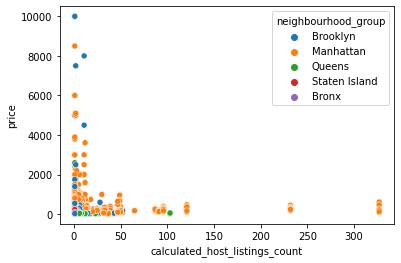

In [ ]:
## Scatterplot (gráfico de dispersão) - Relação entre 2 variáveis

sns.scatterplot( data=dados[dados['last_review'] >' 2016-05-15'], x="calculated_host_listings_count", y='price', hue='neighbourhood_group')
plt.show()

## Pairplot - Relações entre pares de variáveis numéricas (categóricas ou não)

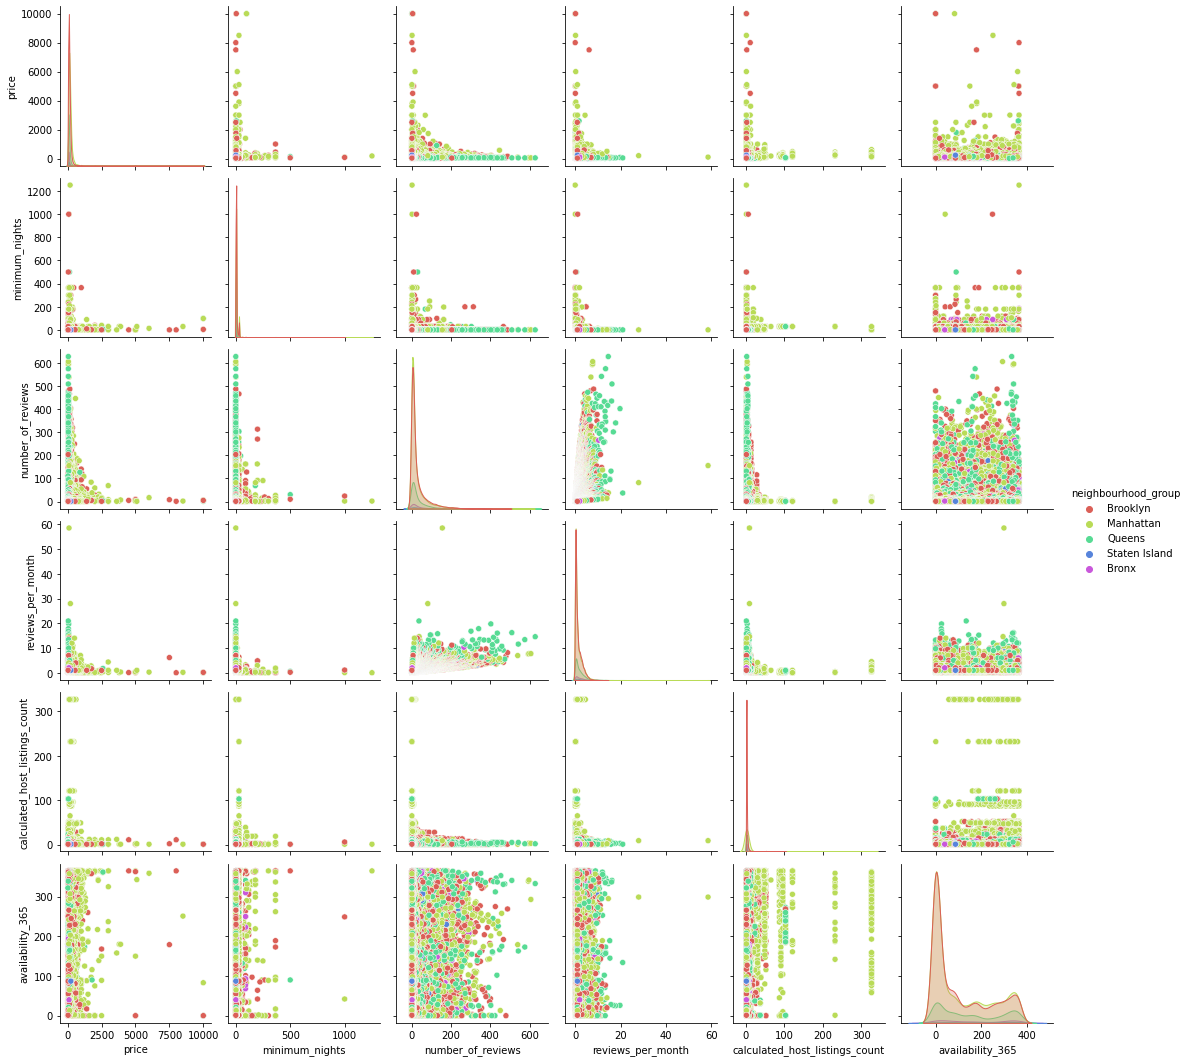

In [ ]:
## Pairplot - Relações entre pares de variáveis numéricas (categóricas ou não)
sns.pairplot(data=dados[dados['last_review'] >' 2016-05-15'].drop(columns=['id', 'name', 'host_id','room_type','latitude', 'longitude']),hue='neighbourhood_group', palette='hls')
plt.show()

outro

In [ ]:
!pip install pandas-profiling
!pip install --upgrade pandas==0.25

In [ ]:
from pandas_profiling import ProfileReport
import pandas as pd

df = pd.read_csv('AB_NYC_2019.csv')

df.drop(columns=['host_name',], inplace=True)

In [ ]:
prof = ProfileReport(df)
prof.to_file('output.html')

/usr/local/lib/python3.7/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)
